In [2]:
!pip install tensorflow

     |████████████████████████████████| 497.6 MB 2.6 kB/s eta 0:00:011     |██████████████▉                 | 230.4 MB 6.3 MB/s eta 0:00:43     |████████████████▎               | 253.9 MB 2.1 MB/s eta 0:01:58     |████████████████▌               | 255.7 MB 1.4 MB/s eta 0:02:57     |██████████████████████████▉     | 417.6 MB 10.7 MB/s eta 0:00:08
     |████████████████████████████████| 462 kB 13 kB/s  eta 0:00:01
     |████████████████████████████████| 2.1 MB 6.7 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 194 kB/s  eta 0:00:01
     |████████████████████████████████| 4.3 MB 66 kB/s  eta 0:00:01
     |████████████████████████████████| 1.0 MB 9.1 MB/s eta 0:00:01
     |████████████████████████████████| 126 kB 7.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.4 MB 76 kB/s  eta 0:00:01
     |████████████████████████████████| 42 kB 189 kB/s  eta 0:00:01
     |████████████████████████████████| 5.8 MB 9.3 kB/s eta 0:00:01
     |████████████████████████████████| 

In [1]:
#import necessary librabry
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2022-04-11 14:20:19.357840: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-11 14:20:19.357924: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
#defining the base, train and validation directory path
base_dir = './data1a'
train_dir = os.path.join(base_dir, 'training')
validation_dir = os.path.join(base_dir, 'validation')

In [3]:
#defining the damage and whole , train nand validation directory
train_damage_dir = os.path.join(train_dir, '00-damage')
train_whole_dir = os.path.join(train_dir, '01-whole')
validation_damage_dir = os.path.join(validation_dir, '00-damage')
validation_whole_dir = os.path.join(validation_dir, '01-whole')

Data Augmentation is used to:
1. Rescale the data 
2. to bring all the image to same dimension  i.e. 150x150


In [4]:
#data augmentation
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(150, 150), 
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1840 images belonging to 2 classes.
Found 460 images belonging to 2 classes.


For training 1840 images are used.
For Validation 460 image are used.

Training and evaluating the model with binary crossentropy loss, accuracy, precision , recall

In [6]:
#defining model
from tensorflow.keras import Model 
from tensorflow.keras.applications import DenseNet121   

base_model = DenseNet121(input_shape = (150, 150, 3),  include_top = False, weights = 'imagenet') 

x=   tf.keras.layers.Flatten()(base_model.output)
x=   tf.keras.layers.Dense(512, activation='relu')(x) 
x=   tf.keras.layers.Dense(1, activation='sigmoid')(x) 

model= Model( base_model.input, x)

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['Accuracy','Precision','Recall'])

#training the model
history = model.fit(
      train_generator,
      epochs=15,
      validation_data=validation_generator,
      verbose=2)

2022-04-11 14:21:05.718526: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-04-11 14:21:05.718716: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (dell): /proc/driver/nvidia/version does not exist
2022-04-11 14:21:05.738391: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/akash/anaconda3/lib/python3.9/site-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/15
92/92 - 357s - loss: 0.4910 - Accuracy: 0.8554 - precision: 0.8578 - recall: 0.8522 - val_loss: 0.2917 - val_Accuracy: 0.9087 - val_precision: 0.8672 - val_recall: 0.9652 - 357s/epoch - 4s/step
Epoch 2/15
92/92 - 382s - loss: 0.1102 - Accuracy: 0.9592 - precision: 0.9700 - recall: 0.9478 - val_loss: 0.2052 - val_Accuracy: 0.9457 - val_precision: 0.9437 - val_recall: 0.9478 - 382s/epoch - 4s/step
Epoch 3/15
92/92 - 418s - loss: 0.0847 - Accuracy: 0.9717 - precision: 0.9759 - recall: 0.9674 - val_loss: 0.4219 - val_Accuracy: 0.9109 - val_precision: 0.8649 - val_recall: 0.9739 - 418s/epoch - 5s/step
Epoch 4/15
92/92 - 364s - loss: 0.0574 - Accuracy: 0.9799 - precision: 0.9773 - recall: 0.9826 - val_loss: 0.5037 - val_Accuracy: 0.9196 - val_precision: 0.9801 - val_recall: 0.8565 - 364s/epoch - 4s/step
Epoch 5/15
92/92 - 447s - loss: 0.0265 - Accuracy: 0.9897 - precision: 0.9923 - recall: 0.9870 - val_loss: 0.7615 - val_Accuracy: 0.9217 - val_precision: 0.9802 - val_recall: 0.860

In [7]:
#weights saving
model.save("./classifier.h5")

plotting the history of train and validation loss, accurcy, precision, recall

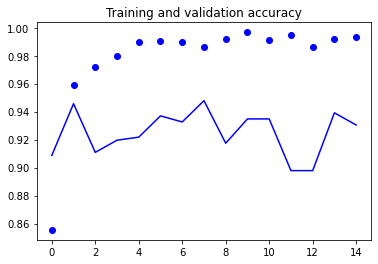

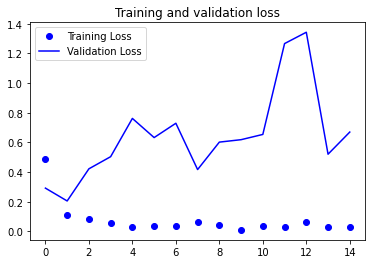

In [8]:
import matplotlib.pyplot as plt
acc = history.history['Accuracy']
val_acc = history.history['val_Accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

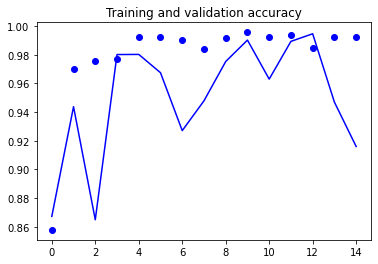

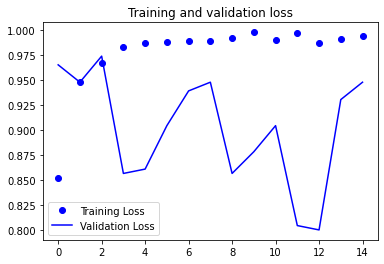

In [9]:
import matplotlib.pyplot as plt
acc = history.history['precision']
val_acc = history.history['val_precision']
loss = history.history['recall']
val_loss = history.history['val_recall']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Testing

The car is not damaged


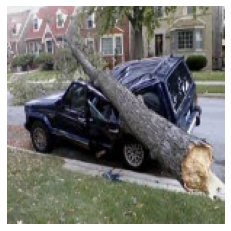

In [10]:
import cv2
im = cv2.imread("./data1a/validation/00-damage/0001.JPEG")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.resize(im, (150, 150)) 
imS=im.reshape([1,150,150,3])
pred=model.predict(np.array(imS))
if pred[0][0]>0.5:
    print("The car is damaged")
else:
    print("The car is not damaged")
plt.axis("off")
plt.imshow(im)

[[0.]]
The car is not damaged


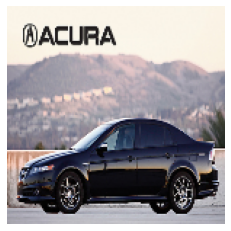

In [11]:
im = cv2.imread("./data1a/validation/01-whole/0006.jpg")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.resize(im, (150, 150)) 
imS=im.reshape([1,150,150,3])
pred=model.predict(np.array(imS))
print(pred)
if pred[0][0]>0.5:
    print("The car is damaged")
else:
    print("The car is not damaged")
plt.axis("off")
plt.imshow(im)


Conclusion: Successfully build a classifier to classify the images containing into damage and undamage cars. 